<a href="https://colab.research.google.com/github/erwakilsahu/Automatic-License-Plate-Detection/blob/main/ANPR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [28]:
# 2. Installing and Importing the Reuired Packages

!pip install easyocr
!pip install imutils
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [29]:
import cv2
print(cv2.__version__)

4.5.4


In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

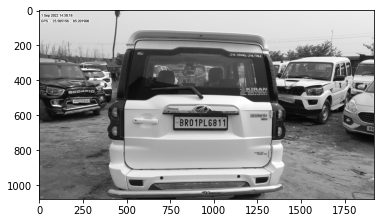

In [40]:
# 3. Convert Colored Image into Grayscale Format

img = cv2.imread("/content/carplate.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

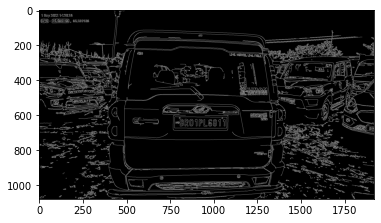

In [41]:
# 4. Apply Filter and Edge Detection

bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [42]:
# 5. Find Contours and Apply Mask

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[ :10]

In [43]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [44]:
location

array([[[ 777,  612]],

       [[ 777,  674]],

       [[1076,  669]],

       [[1076,  612]]], dtype=int32)

In [45]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


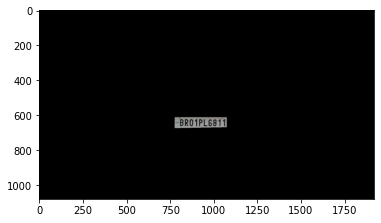

In [46]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [48]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

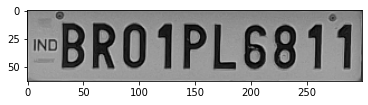

In [50]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [51]:
# 6. Use Easy OCR To Read Text

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 23], [31, 23], [31, 39], [3, 39]], 'IND', 0.9999385390677838),
 ([[25, 0], [300, 0], [300, 63], [25, 63]],
  'BRO IPL68 11',
  0.7094784172927622)]

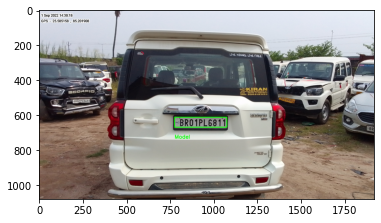

In [59]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text= "Model", org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale=1, color =(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))